In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
%cd /content/drive/MyDrive/ml

[Errno 2] No such file or directory: '/content/drive/MyDrive/ml'
/home/rajesh/Downloads


In [ ]:
df = pd.read_csv('hcvdat0.csv')

In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.shape

(615, 14)

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
def convertCatNum(dataset):
    le = LabelEncoder()
    dataset["Sex"]=le.fit_transform(dataset["Sex"])
    le = LabelEncoder()
    dataset["Category"]=le.fit_transform(dataset["Category"])
    return dataset

In [ ]:
def remNull(dataset):
    
    imputer = SimpleImputer(missing_values=np.nan,strategy="median")
    imputer.fit(dataset.iloc[:,[4,5,6,10,13]])
    dataset.iloc[:,[4,5,6,10,13]]=imputer.transform(dataset.iloc[:,[4,5,6,10,13]])
    print("Checking null value:\n")
    print(dataset.isnull().sum())
    print("\n\n")
    return dataset

In [ ]:
def splitter(dataset):
    X=dataset.iloc[:,2:].values
    y=dataset.iloc[:,1].values
    SD=StandardScaler()
    X=SD.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
    return X_train, X_test, y_train, y_test

In [ ]:
def LogisticsRegression(dataset):
    LG=LogisticRegression(random_state=0)
    pred = LG.fit(X_train,y_train)
    pred = LG.predict(X_test)
    print("\nConfusion Matrix:\t")
    print(confusion_matrix(y_test, pred))
    print("\nAccuracy Score:\t")
    print(accuracy_score(y_test, pred))
    

In [ ]:
df = remNull(df.copy())
df.head()

Checking null value:

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64





,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df = convertCatNum(df.copy())
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
X=SD.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [ ]:
X_train,X_test,y_train,y_test = splitter(df)


In [ ]:
from sklearn.linear_model import LogisticRegression

LG=LogisticRegression(random_state=0)
pred = LG.fit(X_train,y_train)
pred = LG.predict(X_test)
print("\nConfusion Matrix:\t")
print(confusion_matrix(y_test, pred))
print("\nAccuracy Score:\t")
print(accuracy_score(y_test, pred))


Confusion Matrix:	
[[108   0   0   0   0]
 [  1   1   0   0   0]
 [  1   0   0   2   1]
 [  0   0   0   1   1]
 [  0   0   0   1   6]]

Accuracy Score:	
0.943089430894309


In [ ]:
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import linear_model

def lin(ds, y_val):
  y = ds[y_val].values
  ds.drop(y_val, axis=1, inplace=True)
  #print(ds.head())
  x = ds.iloc[:].values


  # Splitting the dataset into training and test set.  
 
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
  classifier = LogisticRegression()
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print(y_pred)
  score = mean_squared_error(y_test, y_pred)
  print("\n Mean Squared error:\t"+str(score))
  sns.lmplot(x='Sex',y='ALB',data=df,aspect=2,height=6)
  print("\n\n")
  ds.plot.scatter(x = 'Sex', y = 'ALB', s = 1, c='green');
  print("\n\n")
  corr = ds.corr()
  sns.heatmap(corr, cmap = 'Wistia', annot= True);
  lm=linear_model.LinearRegression()
  model=lm.fit(x_train,y_train)
  pred=lm.predict(x_train)
  print(pred)
  print(model.coef_)
  print(model.intercept_)
  y_pred = lm.predict(x_test)
  score = mean_squared_error(y_test,y_pred)
  print(score)
  print(r2_score(pred,y_train))
  predd = lm.predict(x_test)
  print(r2_score(predd,y_test))
  #print("\nAccuracy score:\t"+str(accuracy_score(x_test,y_test)*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[37 53 46 52 46 58 46 49 53 49 34 56 57 53 56 57 33 53 35 57 49 55 35 56
 35 46 34 52 46 38 53 49 33 37 41 44 61 59 53 34 46 35 57 41 37 46 44 36
 33 33 47 53 49 33 47 56 46 53 50 36 33 35 33 34 37 57 56 37 62 33 44 45
 50 44 52 43 57 32 34 53 49 37 33 39 53 33 49 49 56 50 33 37 46 33 37 57
 37 44 42 33 44 34 57 35 53 41 33 49 49 38 37 52 42 36 53 56 33 42 32 49
 57 54 46 48 59 32 25 56 32 62 53 44 49 53 33 55 55 46 35 46 35 44 46 53
 44 33 57 43 52 37 33 55 43 53]

 Mean Squared error:	103.14285714285714






[49.13157574 48.95129474 45.84835274 38.01098296 51.8713484  52.47881941
 53.9971047  55.83011121 42.88196961 48.50630465 43.93572796 33.85567224
 50.1183407  39.15118716 43.27645207 39.76692151 46.37763097 35.46284047
 46.81737541 43.38404925 53.50742434 54.6712807  47.04083269 56.49672213
 52.71199063 53.76317072 50.89795272 34.94387017 53.82776538 39.8809788
 54.86041812 43.83061258 48.1619114  50.93562935 42.63044437 55.19131708
 50.08690491 51.34248417 47.45915475 40.444889

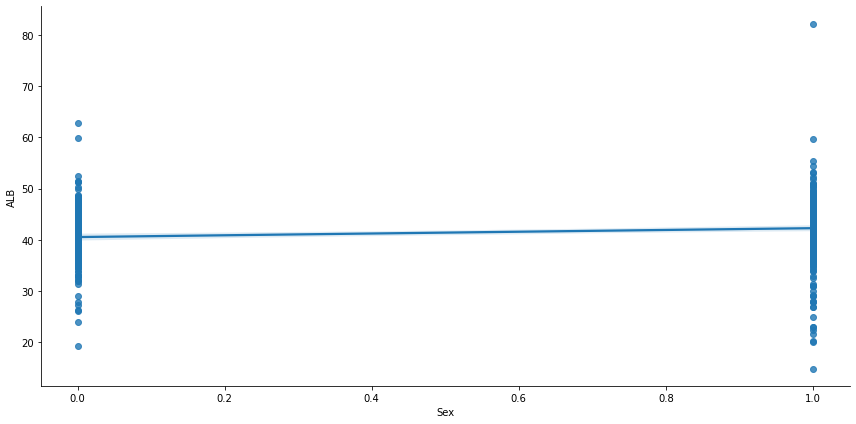

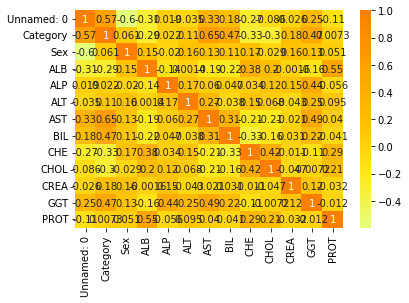

In [ ]:
#model.fit(x, y)
lin(df.copy(), 'Age')

In [ ]:
df_encode = df
# X = df_encode.drop('PE',axis=1) # Independet variable
X = df_encode['AT'].values # Independet variable
y = df_encode['PE'].values # dependent variable

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
lm= LogisticRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

[0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 4 0
 0 0 0 0 0 0 4 3 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
 0 3 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0
 0 0 4 0 0 4 0 0 0 0 4]
[

In [ ]:
def decision(ds, y_val):

  y = ds[y_val].values
  ds.drop(y_val, axis=1, inplace=True)
  #print(ds.head())
  x = ds.iloc[:, [4,5]].values
  #x = ds['Total'].values
  #x = x.reshape(1, -1)


  # Splitting the dataset into training and test set.  
 
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
  classifier = DecisionTreeClassifier(criterion='entropy', random_state=0) 
  classifier.fit(x_train, y_train)
  # pre-pruning
  param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
  }
  grid_cv = GridSearchCV(classifier, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train) 
  y_pred = classifier.predict(x_test)
  print("\nAccuracy score:\t"+str(accuracy_score(y_test,y_pred)*100))
  print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  print("\n\n")
  plt.figure(figsize=(12,8))

  f = plt.figure()
  f.set_figwidth(100)
  f.set_figheight(100)
  tree.plot_tree(classifier.fit(x_train, y_train)) 



Accuracy score:	55.1948051948052
Model accuracy score with criterion entropy index: 0.5519





<Figure size 864x576 with 0 Axes>

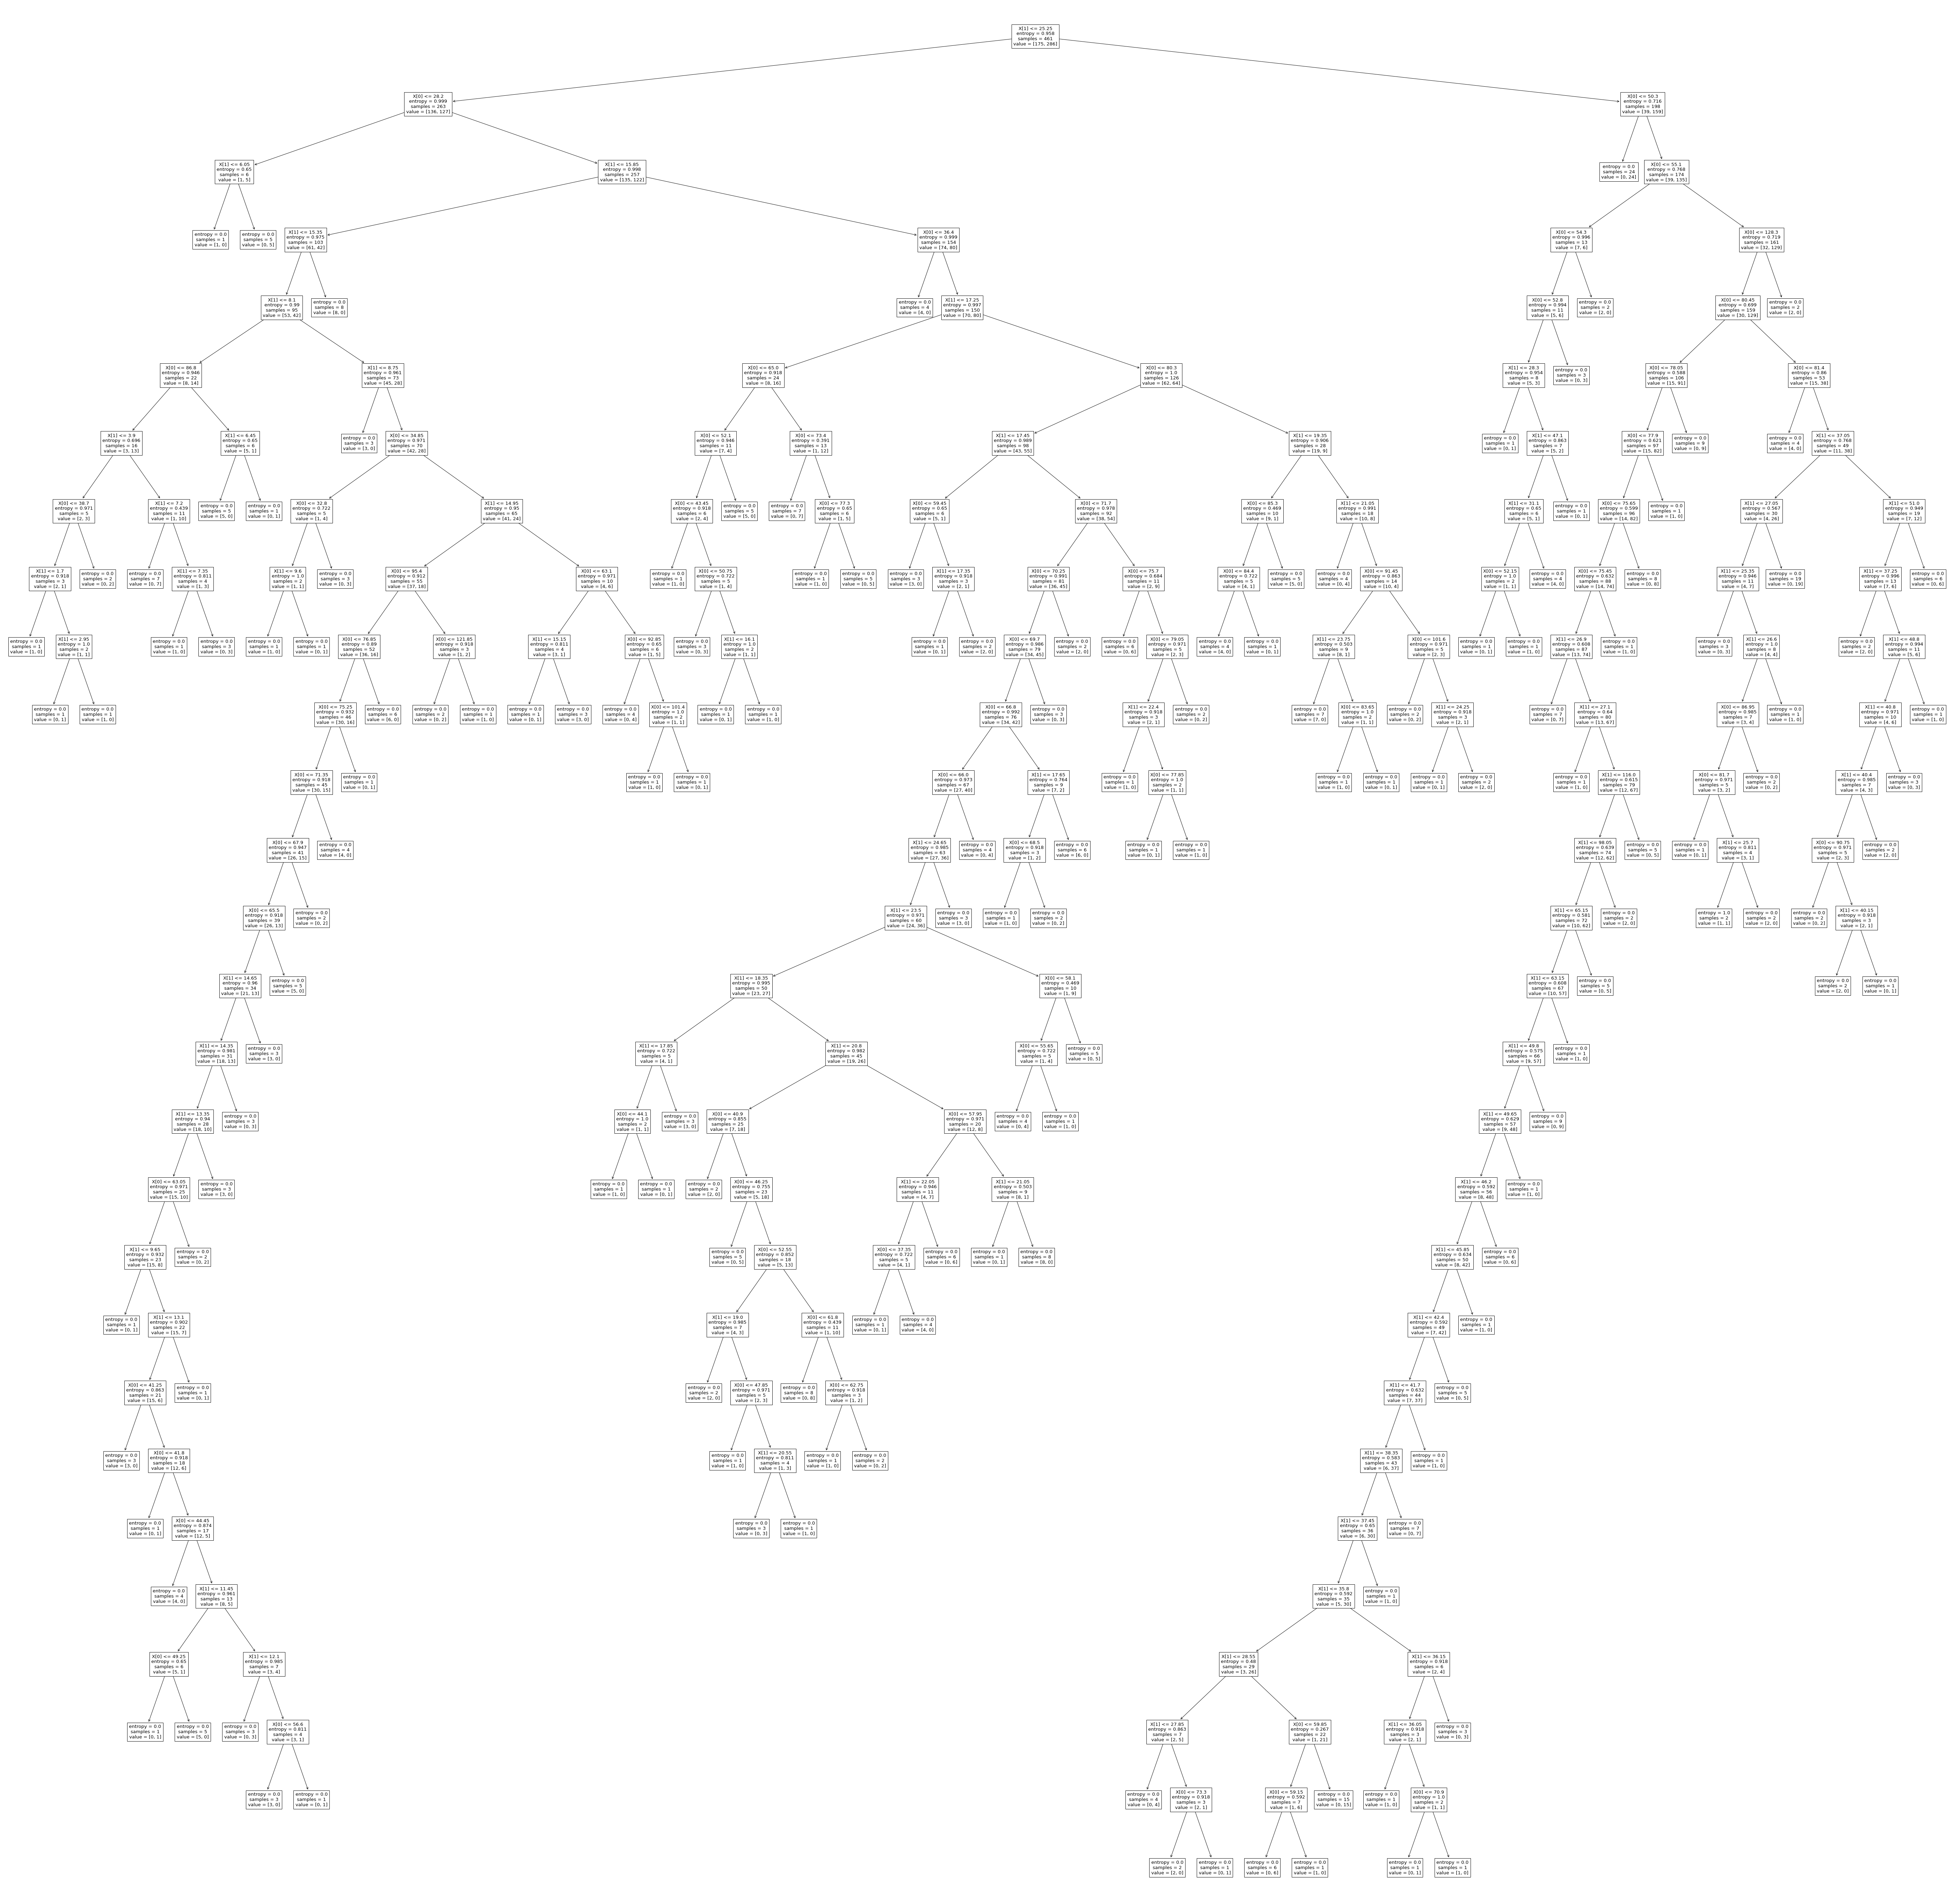

In [ ]:
decision(df.copy(), 'Sex')